# Linear Regression with Python

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df = pd.read_csv('USA_housing.csv') 

In [30]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [31]:
df.info() #checking NaN data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [32]:
df.describe() # statistical data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [33]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

EDA

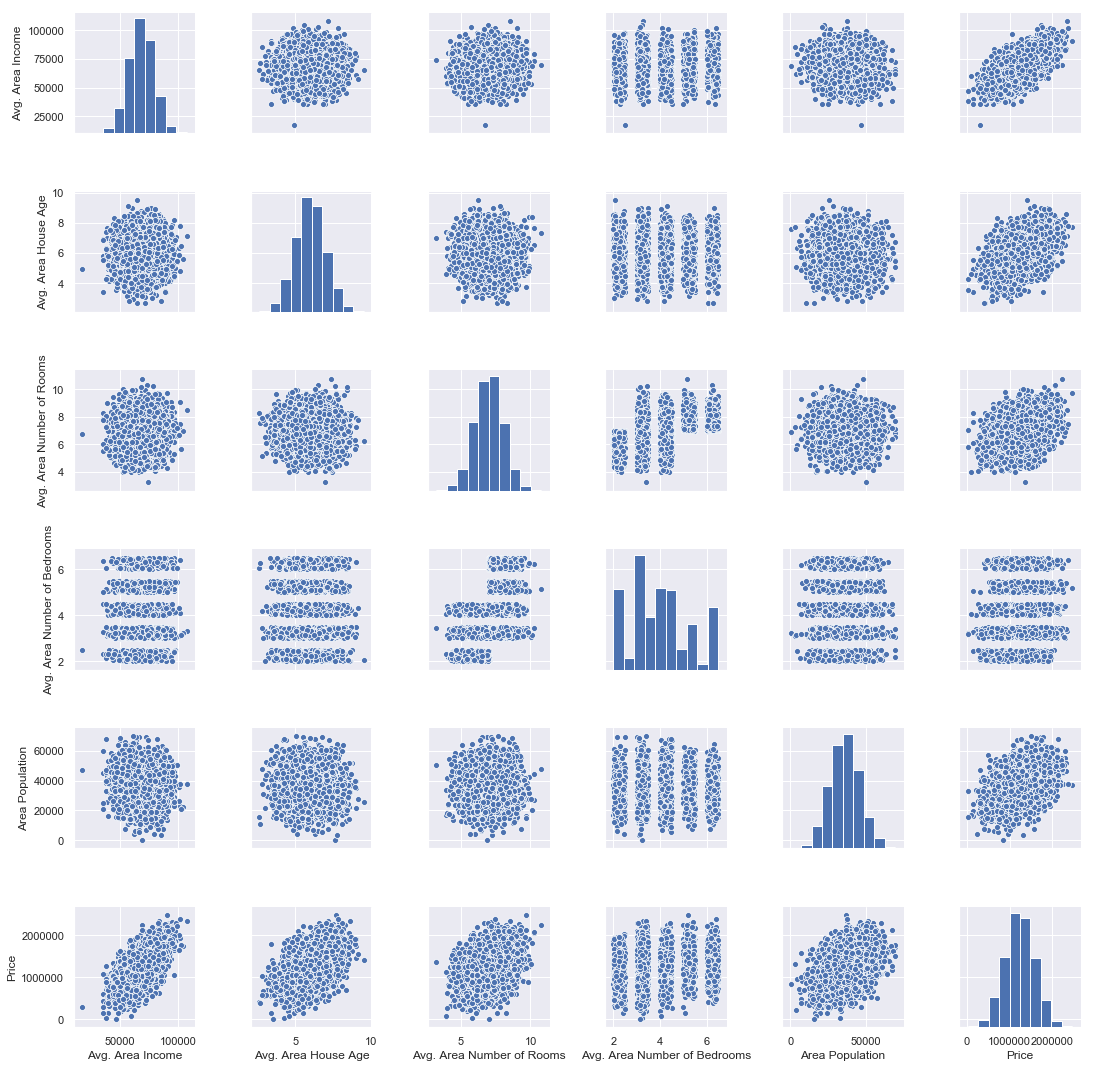

In [34]:
sns.set() # distribution and scatter plot
sns.pairplot(df)

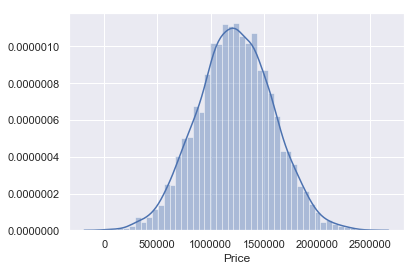

In [35]:
sns.distplot(df['Price'])

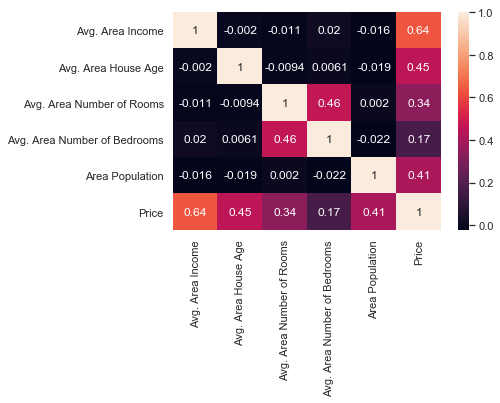

In [37]:
sns.heatmap(df.corr(),annot=True)

Training Linear Regression Model

In [38]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [39]:
from sklearn.model_selection import train_test_split # train test split 40%

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
# Creating and Training Model
lm = LinearRegression()

In [43]:
lm.fit(X_train,y_train) # fit training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
# Model Evaluation
# print the intercept
print(lm.intercept_)

-2640159.796851911


In [45]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [46]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [47]:
cdf =pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf # It was calculated by holding another variable

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Prediction from Model

In [52]:
predictions = lm.predict(X_test) # testing set and just feature

In [53]:
predictions # value of prediction y using X-test into the model

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [54]:
y_test # The real value of y from test dataset

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
2866    7.300436e+05
2371    1.166925e+06
2952    7.054441e+05
45      1.499989e+06
4653    1.288199e+06
891     1.441737e+06
3011    1.279681e+06
335     1.754969e+06
3050    1.511653e+06
3850    1.441956e+06
834     1.119993e+06
3188    7.278665e+05
4675    1.138885e+06
2564    1.074263e+06
1866    1.386473e+06
1492    4.046436e+05
3720    1.449829e+06
618     1.775875e+06
3489    1.202051e+06
2145    1.105737e+06
3200    1.835565e+06
4752    1.795429e+06
602     1.424283e+06
4665    1.365945e+06
79      1.492011e+06
            ...     
4668    1.537865e+06
3762    4.269062e+05
236     8.090897e+05
4897    1.169265e+06
1283    9.809832e+05
2443    5.491679e+05
3600    8.238644e+05
2138    1.467960e+06
254     8.224317e+05
3987    1.550931e+06
527     1.293747e+06
1362    7.582626e+05
4577    1.479063e+06
2642    1.759180e+06
4297    1.864670e+06
1114    1.569122e+06
1041    1.610

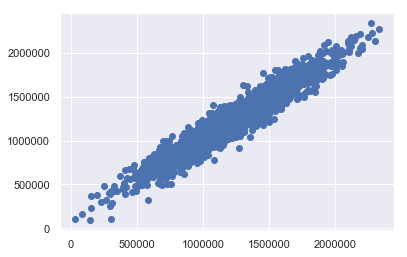

In [55]:
plt.scatter(y_test,predictions) # compare prediction and real value

In [57]:
y_test - predictions

1718     -9272.089973
2511     45459.564039
345     -45443.579711
2521     89338.900475
54      -49929.566311
2866     84289.556693
2371     83709.236994
2952   -149890.831933
45       54317.479217
4653     85353.138340
891     -11786.332371
3011    -20861.158937
335      21440.355879
3050    170029.111839
3850     50723.775199
834    -105774.899282
3188    109512.098903
4675    172681.905091
2564   -147152.857901
1866    186065.781282
1492   -106811.323393
3720   -317345.285843
618     -79513.932679
3489      1749.753015
2145     40889.998679
3200     23695.466377
4752     25848.186809
602     -16702.239032
4665    -22133.258173
79      -52890.338481
            ...      
4668    117254.337789
3762   -146087.554607
236     -21779.063002
4897     60628.835667
1283   -154246.182470
2443   -154989.402529
3600    -27155.189692
2138    -98517.309502
254    -143299.242917
3987    126008.188234
527      29422.706223
1362      8709.046912
4577     87474.839805
2642     26624.702479
4297     6

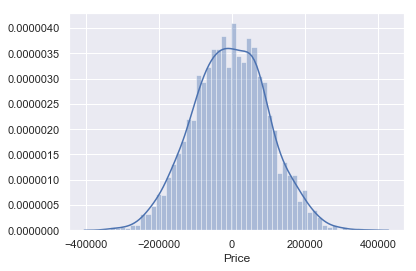

In [24]:
# Residual Histogram
sns.distplot((y_test-predictions),bins=50); # error
# if you have normal distribution histogram it means your linear regression model is the correct chice for the data 

In [56]:
# Regression Evaluation Metrics
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # don't punish large error
print('MSE:', metrics.mean_squared_error(y_test, predictions)) # punish large error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914957
MSE: 10460958907.209507
RMSE: 102278.82922291156


Boston House Price

In [48]:
from sklearn.datasets import load_boston

In [49]:
boston = load_boston()

In [50]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [51]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu